In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

In [2]:
co2_gr = pd.read_csv('co2-gr-gl.csv', delimiter=',', 
                     skiprows=1, names=['year', 'rate', 'err'])
co2_gr['year'] = co2_gr['year'].apply(lambda s: s[:4])
co2_gr.head()

,year,rate,err
0,1959,0.96,0.31
1,1960,0.71,0.27
2,1961,0.78,0.27
3,1962,0.56,0.27
4,1963,0.57,0.28


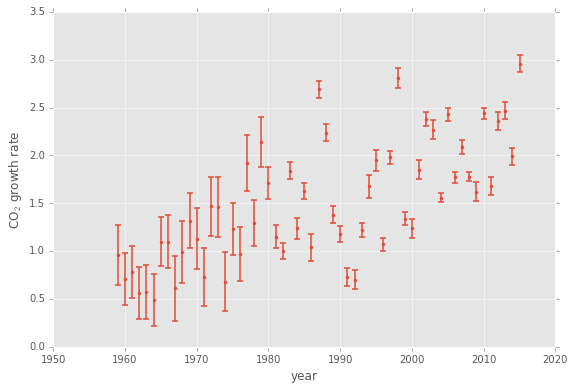

In [3]:
plt.figure(figsize=(9, 6))
plt.errorbar(co2_gr['year'], co2_gr['rate'], yerr=co2_gr['err'], ls='None', 
             marker='.', elinewidth=1.5, capthick=1.5)
plt.xlabel('year')
plt.ylabel('CO$_2$ growth rate')

In [6]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(co2_gr['year'], co2_gr['rate'], test_size=0.25, random_state=1)
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]


def printstuff(estimator, A, b): 
    name = estimator.__str__().split('(')[0] 
    print('+'*6, name, '+'*6)
    print('Slope: {0:.3f} Intercept:{1:.2f} '.format(estimator.coef_[0], estimator.intercept_))
    print("Mean squared residuals: {0:.2f}".format(np.mean((estimator.predict(A) - b)**2)))  
    print('Variance score: {0:.2f}'.format(estimator.score(A, b)))
    
m1 = LinearRegression().fit(X_train, Y_train)
m2 = Lasso(alpha=0.25).fit(X_train, Y_train)
printstuff(m1, X_train, Y_train)
printstuff(m2, X_train, Y_train)

('++++++', 'LinearRegression', '++++++')
Slope: 0.029 Intercept:-55.83 
Mean squared residuals: 0.19
Variance score: 0.54
('++++++', 'Lasso', '++++++')
Slope: 0.028 Intercept:-54.02 
Mean squared residuals: 0.19
Variance score: 0.54


(42,)


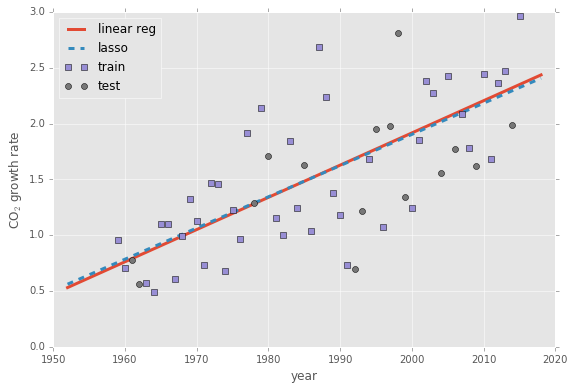

In [27]:
line_x = np.array([1952, 2018]).reshape(-1, 1)
plt.figure(figsize=(9, 6))
plt.plot(line_x, m1.predict(line_x), label='linear reg', lw=3)
plt.plot(line_x, m2.predict(line_x), '--', label='lasso', lw=3)
plt.plot(X_train, Y_train, marker='s', ls='None', label='train')  # cannot use scatter
plt.plot(X_test, Y_test, marker='o', ls='None', label='test')
plt.legend(loc='upper left')
plt.xlabel('year')
plt.ylabel('CO$_2$ growth rate')